In [5]:
import torch
import numpy as np
from sklearn.model_selection import train_test_split
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data.sampler import WeightedRandomSampler
from torch.optim.lr_scheduler import ReduceLROnPlateau

from triagerx.dataset.processor import DatasetProcessor
from triagerx.model.roberta_cnn import RobertaCNNClassifier
from triagerx.model.roberta_fcn import RobertaFCNClassifier
# from triagerx.model.lbt_p import LBTPClassifier
from triagerx.trainer.model_trainer import ModelTrainer
from triagerx.trainer.train_config import TrainConfig
from transformers import AutoTokenizer, AutoModel

In [2]:
dataset_path = "/home/mdafifal.mamun/notebooks/triagerX/notebook/data/openj9/merged_data_dated.csv"

In [3]:
sample_threshold = 5

df = DatasetProcessor.process_dataset(dataset_path, sample_threshold=sample_threshold)

2024-02-04 20:22:48.585 | DEBUG    | triagerx.dataset.processor:load_dataframe:8 - Loading dataframe: /home/mdafifal.mamun/notebooks/triagerX/notebook/data/openj9/merged_data_dated.csv
2024-02-04 20:22:49.493 | DEBUG    | triagerx.dataset.processor:prepare_dataframe:24 - Filtering developers based on minimum contribution: 5...
2024-02-04 20:22:49.499 | DEBUG    | triagerx.dataset.processor:prepare_dataframe:32 - Generating 'text' field...
2024-02-04 20:22:49.554 | DEBUG    | triagerx.dataset.processor:prepare_dataframe:44 - Dropping rows with 'text' length < 15...
2024-02-04 20:22:49.562 | DEBUG    | triagerx.dataset.processor:clean_data:13 - Cleaning dataset...


In [6]:
model_name = "roberta-base"

encoder = AutoModel.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [23]:
X = []

for _, row in df.iterrows():
    text = row.text
    tokens = tokenizer(str(text), max_length=200, padding="max_length", truncation=True, return_tensors="pt")
    encodings = encoder(input_ids=tokens["input_ids"], attention_mask=tokens["attention_mask"])
    pooler_out = encodings.pooler_output.squeeze(0).cpu().detach().numpy()
    
    X.append(pooler_out)


KeyboardInterrupt: 

In [25]:
len(X)

710

In [48]:
toks = [tokenizer(str(issue), max_length=512, truncation=True, return_tensors="pt") for issue in issues]

In [49]:
import torch

In [50]:
toks[0]

{'input_ids': tensor([[ 101, 2036, 6366, 1996, 1996, 2746, 2574, 4431, 1010, 2144, 1996, 2330,
         3501, 2683, 3857, 2003, 2444, 2085, 1012, 2772, 1011, 2125, 1011, 2011,
         1024, 2848, 2911, 2669, 1026, 2848, 1035, 2911, 2669, 1030, 6187, 1012,
         9980, 1012, 4012, 1028,  102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [51]:
with torch.no_grad():
    for tok in toks:
        enc = encoder(input_ids=tok["input_ids"], attention_mask=tok["attention_mask"])["pooler_output"].squeeze(0).numpy()
        embeddings.append(enc)

In [27]:
from nltk.cluster import KMeansClusterer
import nltk
import pandas as pd

def clustering_question(X, NUM_CLUSTERS = 15):
    kclusterer = KMeansClusterer(
        NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance,
        repeats=25,avoid_empty_clusters=True)

    assigned_clusters = kclusterer.cluster(X, assign_clusters=True)

    # data['cluster'] = pd.Series(assigned_clusters, index=data.index)
    # data['centroid'] = data['cluster'].apply(lambda x: kclusterer.means()[x])

    return assigned_clusters

In [29]:
assigned_cluseters = clustering_question(X)

In [33]:
assigned_cluseters

[6,
 13,
 13,
 10,
 3,
 7,
 8,
 13,
 7,
 12,
 10,
 4,
 8,
 13,
 10,
 1,
 10,
 13,
 5,
 1,
 0,
 10,
 8,
 1,
 0,
 1,
 5,
 5,
 10,
 12,
 1,
 9,
 12,
 2,
 1,
 4,
 2,
 8,
 12,
 2,
 3,
 1,
 0,
 12,
 6,
 5,
 8,
 5,
 14,
 9,
 13,
 6,
 1,
 0,
 9,
 6,
 6,
 6,
 6,
 1,
 6,
 7,
 2,
 13,
 1,
 8,
 11,
 7,
 9,
 1,
 3,
 5,
 7,
 1,
 6,
 8,
 6,
 6,
 4,
 14,
 14,
 6,
 12,
 9,
 4,
 7,
 7,
 12,
 8,
 6,
 6,
 7,
 9,
 1,
 2,
 13,
 9,
 8,
 8,
 3,
 7,
 14,
 9,
 9,
 8,
 9,
 8,
 0,
 5,
 12,
 4,
 6,
 10,
 4,
 6,
 2,
 3,
 4,
 6,
 1,
 3,
 3,
 12,
 7,
 9,
 9,
 9,
 1,
 6,
 4,
 6,
 12,
 3,
 13,
 0,
 0,
 3,
 13,
 14,
 8,
 2,
 2,
 6,
 1,
 13,
 6,
 11,
 1,
 7,
 11,
 6,
 9,
 13,
 13,
 5,
 1,
 0,
 9,
 3,
 7,
 7,
 9,
 6,
 2,
 8,
 10,
 5,
 7,
 6,
 1,
 6,
 7,
 6,
 8,
 1,
 5,
 9,
 3,
 13,
 6,
 3,
 6,
 12,
 13,
 4,
 7,
 2,
 9,
 6,
 10,
 6,
 2,
 13,
 13,
 6,
 13,
 8,
 9,
 0,
 7,
 1,
 13,
 3,
 1,
 7,
 9,
 2,
 2,
 7,
 7,
 2,
 6,
 11,
 2,
 7,
 12,
 6,
 6,
 6,
 7,
 4,
 6,
 2,
 7,
 9,
 10,
 6,
 7,
 6,
 9,
 9,
 14,
 0,
 13,
 5,
 3,
 9,


In [35]:
df.iloc[1]

Unnamed: 0                                                     28
issue_number                                                   15
issue_url        https://github.com/eclipse-openj9/openj9/pull/15
issue_title                Refactor and clean up CodeCacheManager
issue_body      - Change invocation parameters of superclass c...
issue_state                                                closed
creator                                                  lmaisons
comments        <comment><user>lmaisons</user><body>This has a...
assignees                                                 0xdaryl
labels                                                   comp:jit
created_at                                   2017-09-14T14:30:51Z
closed_at                                    2017-09-27T20:01:54Z
text            Title: Refactor and clean up CodeCacheManager\...
owner_id                                                        1
Name: 14, dtype: object

In [37]:
from sklearn.manifold import TSNE

In [38]:
dim_reducer = TSNE(n_components=2)

In [42]:
np.array(X)

array([[ 0.0437653 , -0.1336029 ,  0.08015499, ...,  0.2792948 ,
         0.26726043, -0.26128826],
       [ 0.0599221 , -0.14764704,  0.10666545, ...,  0.2749884 ,
         0.2545885 , -0.27445045],
       [ 0.06331136, -0.13870335,  0.08801389, ...,  0.27741587,
         0.25165233, -0.2641101 ],
       ...,
       [ 0.0647355 , -0.14984678,  0.07838216, ...,  0.27411708,
         0.28601977, -0.263366  ],
       [ 0.05230211, -0.1318071 ,  0.09654515, ...,  0.28999662,
         0.2512699 , -0.2604924 ],
       [ 0.07155465, -0.14233816,  0.09455281, ...,  0.28291512,
         0.27494723, -0.26752204]], dtype=float32)

In [44]:
transformed = dim_reducer.fit_transform(np.array(X))

In [45]:
import matplotlib.pyplot as plt

In [50]:
transformed

array([[  9.560815  ,  -3.3605237 ],
       [-25.355352  ,   5.3255467 ],
       [-22.08252   ,   0.12236407],
       ...,
       [ 32.73579   ,  -2.920028  ],
       [-32.27649   ,  -0.7290825 ],
       [-16.980675  ,  10.939164  ]], dtype=float32)

In [54]:
labels = df["owner_id"].to_list()

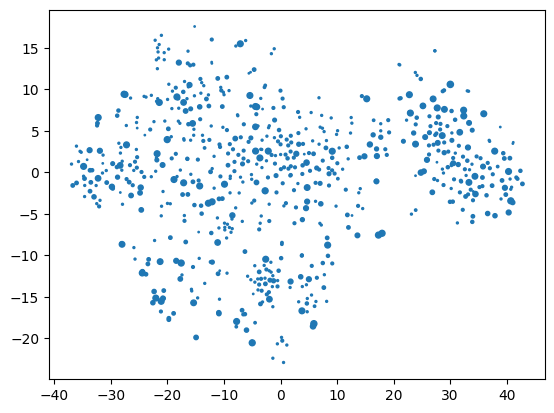

In [55]:
plt.scatter(transformed[:,0], transformed[:,1], labels[:710])

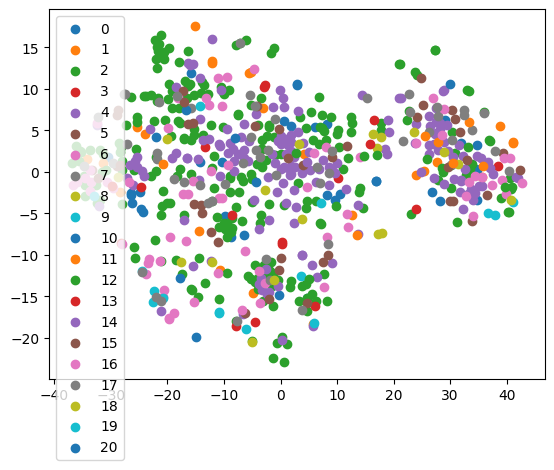

In [56]:
fig, ax = plt.subplots()
scatter_x = transformed[:,0]
scatter_y = transformed[:,1]
group = np.array(labels[:710])
for g in np.unique(group):
    i = np.where(group == g)
    ax.scatter(scatter_x[i], scatter_y[i], label=g)
ax.legend()
plt.show()

In [36]:
len(X[0])

768

In [32]:
dictt = {}

for i in range(len(X)):
    dictt[]

array([ 4.37652990e-02, -1.33602902e-01,  8.01549852e-02, -3.12418520e-01,
        1.23611704e-01,  4.74663600e-02,  5.58829345e-02,  1.89292237e-01,
       -1.69965744e-01,  5.41856065e-02,  2.60895073e-01, -8.37588012e-02,
        8.07258263e-02, -2.79971540e-01, -1.75364971e-01, -1.04826048e-01,
        3.33334953e-01,  8.60621482e-02, -1.21301487e-02, -4.06873487e-02,
        2.13899296e-02, -1.50765792e-01,  3.36822808e-01,  5.87386005e-02,
        3.84001613e-01, -3.35907251e-01, -2.75127858e-01, -2.64807612e-01,
       -6.59297919e-03,  7.41648301e-03, -2.36302838e-02,  1.96147680e-01,
       -6.55917153e-02, -3.70637447e-01, -4.30672383e-03, -2.92191118e-01,
       -4.66477983e-02,  6.86050504e-02, -9.22873616e-02,  1.35276601e-01,
       -3.22959393e-01,  1.87270179e-01,  2.85630912e-01,  6.63274676e-02,
       -3.54823440e-01,  5.00520110e-01, -3.97172779e-01,  4.01987076e-01,
       -1.41445220e-01,  2.33460397e-01,  2.30160788e-01,  2.19469011e-01,
        3.92613769e-01, -

In [31]:
assigned_cluseters

[6,
 13,
 13,
 10,
 3,
 7,
 8,
 13,
 7,
 12,
 10,
 4,
 8,
 13,
 10,
 1,
 10,
 13,
 5,
 1,
 0,
 10,
 8,
 1,
 0,
 1,
 5,
 5,
 10,
 12,
 1,
 9,
 12,
 2,
 1,
 4,
 2,
 8,
 12,
 2,
 3,
 1,
 0,
 12,
 6,
 5,
 8,
 5,
 14,
 9,
 13,
 6,
 1,
 0,
 9,
 6,
 6,
 6,
 6,
 1,
 6,
 7,
 2,
 13,
 1,
 8,
 11,
 7,
 9,
 1,
 3,
 5,
 7,
 1,
 6,
 8,
 6,
 6,
 4,
 14,
 14,
 6,
 12,
 9,
 4,
 7,
 7,
 12,
 8,
 6,
 6,
 7,
 9,
 1,
 2,
 13,
 9,
 8,
 8,
 3,
 7,
 14,
 9,
 9,
 8,
 9,
 8,
 0,
 5,
 12,
 4,
 6,
 10,
 4,
 6,
 2,
 3,
 4,
 6,
 1,
 3,
 3,
 12,
 7,
 9,
 9,
 9,
 1,
 6,
 4,
 6,
 12,
 3,
 13,
 0,
 0,
 3,
 13,
 14,
 8,
 2,
 2,
 6,
 1,
 13,
 6,
 11,
 1,
 7,
 11,
 6,
 9,
 13,
 13,
 5,
 1,
 0,
 9,
 3,
 7,
 7,
 9,
 6,
 2,
 8,
 10,
 5,
 7,
 6,
 1,
 6,
 7,
 6,
 8,
 1,
 5,
 9,
 3,
 13,
 6,
 3,
 6,
 12,
 13,
 4,
 7,
 2,
 9,
 6,
 10,
 6,
 2,
 13,
 13,
 6,
 13,
 8,
 9,
 0,
 7,
 1,
 13,
 3,
 1,
 7,
 9,
 2,
 2,
 7,
 7,
 2,
 6,
 11,
 2,
 7,
 12,
 6,
 6,
 6,
 7,
 4,
 6,
 2,
 7,
 9,
 10,
 6,
 7,
 6,
 9,
 9,
 14,
 0,
 13,
 5,
 3,
 9,
